Carregando modelo e artefatos...
Avaliando modelo...
              precision    recall  f1-score   support

    not spam       0.99      0.99      0.99       563
        spam       0.97      0.96      0.96       112

    accuracy                           0.99       675
   macro avg       0.98      0.98      0.98       675
weighted avg       0.99      0.99      0.99       675



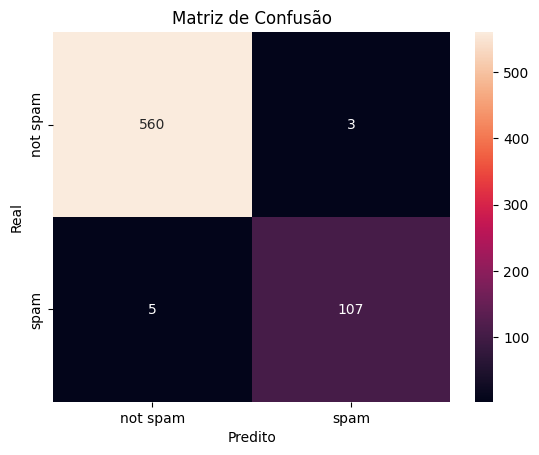

In [1]:
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# carregar modelo, threshold, vetorizador e vetores de dados
print("Carregando modelo e artefatos...")
model = joblib.load('../models/modelo_final.pkl')
threshold = joblib.load('../models/threshold.pkl')
vectorizer = joblib.load('../models/tfidf_vectorizer.pkl')
X = joblib.load('../models/X_tfidf.pkl')
y = joblib.load('../models/y_labels.pkl')

# Separar em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Avaliar modelo com threshold ajustado
print("Avaliando modelo...")
y_probs = model.predict_proba(X_test)
y_pred = ['spam' if p[1] >= threshold else 'not spam' for p in y_probs]

print(classification_report(y_test, y_pred))

# matriz de confusão - grafico #
cm = confusion_matrix(y_test, y_pred, labels=['not spam', 'spam'])
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['not spam', 'spam'], yticklabels=['not spam', 'spam'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()
